<a href="https://colab.research.google.com/github/Kac1509/ZebrafishClassifier/blob/master/ClassifierTuningHyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os

#Set if running locally or in Google Col}aboratory
Colab = False
if Colab:
    Script_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/scripts'
    Base_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/'
    from google.colab import drive
    drive.mount('/content/gdrive')
else:
    Script_path = os.getcwd() + '/Classifier/scripts'
    Base_path = 'Classifier/'

#Add script folder to system path
sys.path.insert(0, Script_path)
print(sys.path)

%load_ext autoreload
%autoreload 2

from createSets import *
from GenotypeClass import *
from predictClass import *
from Setup import *
from Model import *
from HyperparameterTuning import *
from setParameters import *
from dataVisualization import *

['C:\\Users\\Kaleem\\EPFL\\Fall 2018\\Machine Learning\\Project_2\\Git\\ZebrafishClassifier/Classifier/scripts', '', 'C:\\Users\\Kaleem\\Anaconda3\\python36.zip', 'C:\\Users\\Kaleem\\Anaconda3\\DLLs', 'C:\\Users\\Kaleem\\Anaconda3\\lib', 'C:\\Users\\Kaleem\\Anaconda3', 'C:\\Users\\Kaleem\\AppData\\Roaming\\Python\\Python36\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Kaleem\\AppData\\Roaming\\SPB_Data\\.ipython']


C:\Users\Kaleem\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
Extracted_path,Partitioned_path,Prediction_path,Validation_prediction_path = setupEnv(Base_path,'DataStraightened.zip')

In [3]:
Genotypes = createGenotypes(Extracted_path,Partitioned_path)

3


[0.1  0.99]
parameter = 0.1
31
76
33
Fold:  0  test_index:  [ 1  2  5  9 11 13 16 18 26 28 30]
Found 60 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Epoch 1/3
 - 4s - loss: 0.9067 - acc: 0.5556 - val_loss: 0.8033 - val_acc: 0.5556
Epoch 2/3
 - 3s - loss: 0.7831 - acc: 0.5611 - val_loss: 0.7349 - val_acc: 0.5657
Epoch 3/3
 - 3s - loss: 0.7250 - acc: 0.5667 - val_loss: 0.6945 - val_acc: 0.5859
Fold:  1  test_index:  [ 0  6 10 12 17 20 21 24 27 29]
Found 63 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/3
 - 4s - loss: 0.5433 - acc: 0.7566 - val_loss: 0.5064 - val_acc: 0.7667
Epoch 2/3
 - 3s - loss: 0.5006 - acc: 0.7566 - val_loss: 0.4797 - val_acc: 0.7778
Epoch 3/3
 - 3s - loss: 0.4756 - acc: 0.7831 - val_loss: 0.4588 - val_acc: 0.7778
Fold:  2  test_index:  [ 3  4  7  8 14 15 19 22 23 25]
Found 63 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/3
 - 3s - loss: 0.6786 - acc: 0.6561 - val_loss: 0.6266

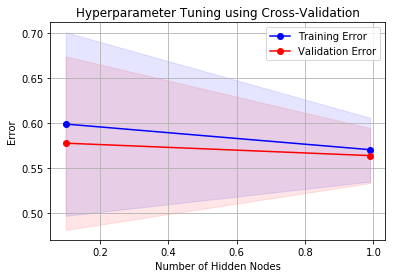

In [4]:
Tuning = True
if Tuning:

    #learning_rates = np.logspace(-7, -2, 7)
    #hidden_nodes = [4, 8, 16, 32, 64]#, 128, 256, 512, 1024]
    dropout = np.linspace(0.1, 0.99, 2)
    #input_sizes = [[75,750],[75,375], [75,150], [75,75], [50,50]]
    
    hyperparameters,loss_tr,loss_te,loss_trSTD,loss_teSTD,Plot_Xlabel = Hyperparameter_tuning(Base_path,
                                                                                              Extracted_path,
                                                                                              Partitioned_path,
                                                                                              Genotypes,
                                                                                              HypVals = dropout)
    cross_validation_visualization1(hyperparameters,loss_tr, loss_trSTD,loss_te, loss_teSTD,Plot_Xlabel)
else:
    #Partition data into training and test set
    #If fixed set to true, all training and test sets have the same size for all classes 
    createTrain_Test(Genotypes,0.3, fixed = True)
    
    Hyperparameters = setParameters(Base_path, shapeY = 50, shapeX = 50, dropout_rate = 0, LR = 0.0001, num_nodes = 256, VGG16 = True)
    Gen,Hist,Mdl = runModel(Partitioned_path,Genotypes,Hyperparameters,epochs=3)
    plot_loss_acc(Hist)
    
    
    #Format predictions to 4 decimal points
    float_formatter = lambda x: "%.4f" % x
    np.set_printoptions(formatter={'float_kind':float_formatter})
    
    #Predict Inages in prediction path and save predictions to a csv file
    predictionFiles, predictions = predictClass(Mdl,Prediction_path, Hyperparameters, class_mode='categorical')
    savePredictions(Base_path,predictions,predictionFiles,Hyperparameters)

